<a href="https://colab.research.google.com/github/ahmadrb2006/ahmadrb2006.github.io/blob/master/KerasBook_code3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# movie review classification

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
from tensorflow.keras.datasets import imdb
(tr_data, tr_labels), (te_data, te_labels) = imdb.load_data(num_words=10000)

In [ ]:
print(tr_data[:10])
print(tr_labels[:10])
max([max(sequence) for sequence in tr_data])

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

9999

In [ ]:
# decoding the review from numbers back to text using the word indices
word_index=imdb.get_word_index()
reverse_word_index=dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review=" ".join(
    [reverse_word_index.get(i-3,"?") for i in tr_data[0]]
)

print(tr_data[0])
print(decoded_review)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
? this film was just brilliant casting location scenery stor

In [ ]:
# multi-hot encoding the reviews
# since the max word index is 10000, each list is converted into a 10000-element
# vector, with 1's at locations where that number appeared in the review, and 0's 
# for the rest. For example: [2,3]=>[0 0 1 1 0 0 0 ...... 0 0] 

def vectorize_sequences(sequences, dimension=10000):
  results=np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j]=1.
  return results

x_train = vectorize_sequences(tr_data)
x_test = vectorize_sequences(te_data)

# print(x_train[0])

y_train = np.asarray(tr_labels).astype("float32")
y_test = np.asarray(te_labels).astype("float32")

print(x_train[10])

[0. 1. 1. ... 0. 0. 0.]


In [ ]:
# model definition and compilation
model = keras.Sequential([
                          layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
# creating validation data and training the model
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))



Epoch 1/4
30/30 [==============================] - 1s 33ms/step - loss: 0.5321 - accuracy: 0.7767 - val_loss: 0.4118 - val_accuracy: 0.8576
Epoch 2/4
30/30 [==============================] - 1s 19ms/step - loss: 0.3208 - accuracy: 0.9011 - val_loss: 0.3161 - val_accuracy: 0.8820
Epoch 3/4
30/30 [==============================] - 1s 19ms/step - loss: 0.2288 - accuracy: 0.9270 - val_loss: 0.2808 - val_accuracy: 0.8888
Epoch 4/4
30/30 [==============================] - 1s 18ms/step - loss: 0.1811 - accuracy: 0.9414 - val_loss: 0.2897 - val_accuracy: 0.8824


782/782 [==============================] - 2s 3ms/step - loss: 0.3115 - accuracy: 0.8715
[0.3115037977695465, 0.8715199828147888]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


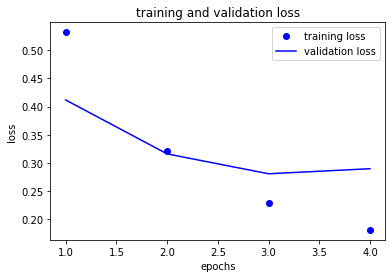

In [ ]:
results=model.evaluate(x_test, y_test)
print(results)

# getting history dict
history_dict=history.history
print(history_dict.keys())
# plotting the training and validation loss

loss_values=history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs=range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="training loss")
plt.plot(epochs, val_loss_values, "b", label="validation loss")
plt.title("training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

# 'plt.claf()'  can be used to clear the figure

In [ ]:
print(model.predict(x_test))

[[0.18341595]
 [0.99907386]
 [0.7806168 ]
 ...
 [0.09420405]
 [0.12192444]
 [0.4955408 ]]
